# Data Science Group Project
### Group 51
Thuseevan Nareshkumar 46328785 <br>
Ryan Lam 45951292<br>
Md Fahad Rahman 45728836
### Name and Student number 
add you name here then remove this 

# Introduction
 Transport Performance and Analytics (TPA) is a Center of Excellence that provides objective and trustworthy transportation data, recommendations, and analysis. TPA brings to offer an evidence foundation for strategic decision-making in support of an efficient transportation system. 
Gathering data from their archives, the following project is built puttiing emphasis on diifferent analysis of uses of transport throughout Sydney. 

# Project Goal
**"How the dataset can be used in analysing different aspects of transportation?"**

By providing various analysis to  the question is our following goals:
- Explore with our chosen dataframe.
- Take advantage of the various sources to reach an optimal conclusion that will help with either decision making/support.
- Provide analysis that will enable us to correlate trends/patterns withreal world activities which will include:
  - Distinction between an array of transportation rush hours
  - In which month people travel more
  - Analysis through outliners

# Data source
The dataset is from the Bureau of Transport Statistics. This dataset contains NSW trains official train utilisation figures for Intercity train lines only. These figures include the data of passengers who on/tap off well as passeners who bought tickets when entering and exiting the transportation service stations. It is set out as a line and aggregated into a monthly figure for a passenger for their estimated times of travel during that month. 
The data was collected from opal train trips by month,line and card type, from July 2016 to August 2021. The format of the data set is in CSV. Here is a link to the relevant document page: https://opendata.transport.nsw.gov.au/dataset/opal-trips-train.

<b>Note<b>: There were limited amount of data provided for several months in the year 2016 and 2021.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import matplotlib.pylab as plt
from matplotlib.pyplot import imread
%matplotlib inline

#---Linear Regression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

#---naive bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

#---KMeans Clustering 
from sklearn.cluster import KMeans

#---feature selection
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

#---data processing
from sklearn import preprocessing
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split

import warnings

In [2]:
#We tried importing the file, but this method didn’t work for some reason.
#pd.show_versions()
#data = pd.read_csv("files/TrainCardType.csv")
# we had error opeing the file

## Importing the dataset

In [3]:
#We realised that there was an error with encoding the file. After resolving the the issue, we were able to import the file.
# importing the file
data = pd.read_csv("files/TrainCardType.csv", encoding='utf-16',sep="\t")

In [4]:
#show data head
data.head(2)

,Route,Travel type,1/07/2016+C1:BA1,Aug-16,Sep-16,Oct-16,Nov-16,Dec-16,Jan-17,Feb-17,...,Dec-20,Jan-21,Feb-21,Mar-21,Apr-21,May-21,Jun-21,Jul-21,Aug-21,Sep-21
0,"T1 North Shore, Northern and Western Line",Adult,"8,575,135","9,484,134","8,956,112","8,778,524","9,221,978","8,036,202","7,774,754","8,446,672",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"T1 North Shore, Northern and Western Line",Child/Youth,"432,083","370,300","425,154","438,430","404,288","505,401","552,039","394,228",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cleaning the Data

In [5]:
# renaming 
data = data.rename(columns={"1/07/2016+C1:BA1": "Jul-16"})
#data.head()

In [6]:
# renaming 
data = data.rename(columns={"Travel type": "Travel_type"})
#data.head()

In [7]:
#checking the data set size 
print("The size of the data is : ", data.shape) 
print("The number of row {} and number of columns {} ".format(data.shape[0], data.shape[1]))

The size of the data is :  (248, 65)
The number of row 248 and number of columns 65 


In [8]:
# checking data type 
print(type(data))
print(type(data['Jul-16']))
print(type(data['Jul-16'][0]))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'str'>


In [9]:
#show infor for data
#data.info()

In [10]:
# Deal with the NaN values in the data
data.isna().sum()

Route            0
Travel_type      0
Jul-16         139
Aug-16         139
Sep-16         139
              ... 
May-21          69
Jun-21          69
Jul-21          75
Aug-21          73
Sep-21          73
Length: 65, dtype: int64


<b>Note</b>: The data set have too many null values. Dropping the null value drops almost 70% of the data. We tried dropping the value but too many rows and coulmns were droped. As a result we had to work on the dataset as it was after thorough cleaning. 

In [11]:
#data =data.dropna()
#data.shape
#data.head(2)

# add more, why did we decide to replace null with 0

In [12]:
#we decide to assign 0 to null values
data.fillna( '0', inplace = True)
#data.head(2)

<b>Functions to remove ','

In [13]:
data = data.replace(',','', regex=True)

<b>Changing all object into numeric values

In [14]:
for x in data.columns[2:]:
    data[x] = pd.to_numeric(data[x])

In [15]:
#str to int / checking
type(data['Jul-16'][0])

numpy.int64

## Droping last column which will directly affect the our analysis.

In [16]:
# drop the last row Grand Total
data_c =data.drop(247)
data_c.tail(2)

,Route,Travel_type,Jul-16,Aug-16,Sep-16,Oct-16,Nov-16,Dec-16,Jan-17,Feb-17,...,Dec-20,Jan-21,Feb-21,Mar-21,Apr-21,May-21,Jun-21,Jul-21,Aug-21,Sep-21
245,T9 Northern Line,Sgl Trip Rail Adult,0,0,0,0,0,0,0,0,...,1331,836,1189,1295,2172,1663,927,187,130,162
246,T9 Northern Line,Sgl Trip Rail Child/Youth,0,0,0,0,0,0,0,0,...,957,941,726,783,1897,1020,634,169,80,104


## Observations

In [17]:
data_c.Route.value_counts()

T9 Northern Line                            12
T2 Inner West Line                          12
South Coast Line                            12
T4 Eastern Suburbs and Illawarra Line       12
T5 Cumberland Line                          12
Southern Highlands Line                     12
T6 Carlingford Line                         12
T1 Northern Line                            12
T8 Airport and South Line                   12
Hunter Line                                 12
T1 North Shore Line                         12
Central Coast Newcastle Line                12
T1 Western Line                             12
T2 Leppington Line                          12
T7 Olympic Park Line                        12
Blue Mountains Line                         12
T3 Bankstown Line                           12
T2 Airport Inner West and South Line        11
Station Link                                11
T1 North Shore Northern and Western Line    11
T6 replacement buses                        10
Name: Route, 

In [18]:
# extract all name of the Route
data_c['Route'].unique()

array(['T1 North Shore Northern and Western Line',
       'T2 Airport Inner West and South Line', 'T3 Bankstown Line',
       'T4 Eastern Suburbs and Illawarra Line', 'T5 Cumberland Line',
       'T6 Carlingford Line', 'T7 Olympic Park Line',
       'Blue Mountains Line', 'Central Coast Newcastle Line',
       'Hunter Line', 'South Coast Line', 'Southern Highlands Line',
       'Station Link', 'T1 North Shore Line', 'T1 Northern Line',
       'T1 Western Line', 'T2 Inner West Line', 'T2 Leppington Line',
       'T6 replacement buses', 'T8 Airport and South Line',
       'T9 Northern Line'], dtype=object)

<b>There are 21 differnt train routes 

In [19]:
data_c['Travel_type'].unique()

array(['Adult', 'Child/Youth', 'Concession',
       'Day Pass Child/Youth w/o SAF', 'Day Pass without SAF', 'Employee',
       'Free Travel', 'School Student', 'Senior/Pensioner',
       'Sgl Trip Rail Adult', 'Sgl Trip Rail Child/Youth', 'CTP'],
      dtype=object)

In [20]:
data_c.describe()

,Jul-16,Aug-16,Sep-16,Oct-16,Nov-16,Dec-16,Jan-17,Feb-17,Mar-17,Apr-17,...,Dec-20,Jan-21,Feb-21,Mar-21,Apr-21,May-21,Jun-21,Jul-21,Aug-21,Sep-21
count,2.470000e+02,2.470000e+02,2.470000e+02,2.470000e+02,2.470000e+02,2.470000e+02,2.470000e+02,2.470000e+02,2.470000e+02,2.470000e+02,...,2.470000e+02,2.470000e+02,2.470000e+02,2.470000e+02,2.470000e+02,2.470000e+02,2.470000e+02,247.000000,247.000000,247.000000
mean,1.166771e+05,1.311497e+05,1.240824e+05,1.218900e+05,1.267947e+05,1.141279e+05,1.082406e+05,1.164657e+05,1.399449e+05,1.163795e+05,...,6.548096e+04,5.512768e+04,7.192491e+04,8.471985e+04,8.320850e+04,8.517655e+04,6.960921e+04,21331.307692,17189.834008,18485.323887
std,7.011211e+05,7.684896e+05,7.304312e+05,7.160032e+05,7.536720e+05,6.735766e+05,6.489393e+05,6.932163e+05,8.139497e+05,6.747326e+05,...,2.018115e+05,1.743364e+05,2.124248e+05,2.476054e+05,2.411020e+05,2.487978e+05,2.058082e+05,73654.659210,59846.955262,63180.665555
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.253000e+03,9.370000e+02,1.335000e+03,1.546000e+03,1.897000e+03,1.663000e+03,1.265000e+03,223.000000,178.000000,144.000000
75%,7.531000e+03,1.001850e+04,9.155500e+03,1.013950e+04,8.962000e+03,7.860500e+03,6.165500e+03,7.850000e+03,1.113300e+04,1.110300e+04,...,3.229750e+04,1.650900e+04,3.790550e+04,4.217350e+04,4.068900e+04,4.268650e+04,3.140250e+04,4597.500000,3145.000000,3583.000000
max,8.575135e+06,9.484134e+06,8.956112e+06,8.778524e+06,9.221978e+06,8.036202e+06,7.774754e+06,8.446672e+06,9.994667e+06,8.111738e+06,...,1.671861e+06,1.538773e+06,1.713603e+06,1.982189e+06,1.856641e+06,1.937118e+06,1.596551e+06,631262.000000,530477.000000,534231.000000


##  Spliting  the data set according to years

In [21]:
data_2016 = []
data_2017 = []
data_2018 = []
data_2019 =[]
data_2020=[]
data_2021=[]
for i in range(2,8):
    data_2016.append(data_c.columns[i])
for i in range(8,20):
    data_2017.append(data_c.columns[i])
for i in range(20,32):
    data_2018.append(data_c.columns[i])
for i in range(32,44):
    data_2019.append(data_c.columns[i])
for i in range(44,56):
    data_2020.append(data_c.columns[i])
for i in range(56,65):
    data_2021.append(data_c.columns[i])

In [22]:
#checking 
data_2018

['Jan-18',
 'Feb-18',
 'Mar-18',
 'Apr-18',
 'May-18',
 'Jun-18',
 'Jul-18',
 'Aug-18',
 'Sep-18',
 'Oct-18',
 'Nov-18',
 'Dec-18']

In [23]:
data_16 = data_c[data_2016]
data_17 = data_c[data_2017]
data_18 = data_c[data_2018]
data_19 = data_c[data_2019]
data_20 = data_c[data_2020]
data_21 = data_c[data_2021]

In [24]:
#total people travelled 
total16 = (data_16.sum()).sum()
total17 = (data_17.sum()).sum()
total18 = (data_18.sum()).sum()
total19 = (data_19.sum()).sum()
total20 = (data_20.sum()).sum()
total21 = (data_21.sum()).sum()

### 2016 July to December

Text(0, 0.5, 'Number of People Travavelled(M)')

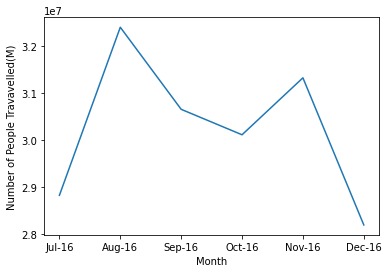

In [25]:
data_16.sum().plot()
plt.xlabel('Month')
plt.ylabel('Number of People Travavelled(M)')

<b>Observation</b>: It can be observed here that the number of travellers increased rapidly from July to August in the year of 2016. It started to decrease drasticaly from the mid of August to mid of october. However the numbers started to increase a bit up to November and started to dicline again until december. 

### 2017 Jan to December

Text(0, 0.5, 'Number of People Travavelled(M)')

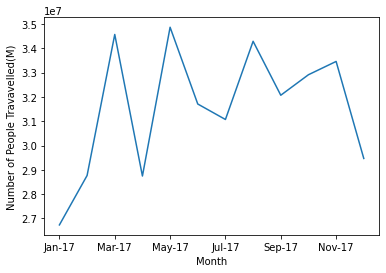

In [26]:
data_17.sum().plot()
plt.xlabel('Month')
plt.ylabel('Number of People Travavelled(M)')

<b>Observation:</b> Passengers started to ride the train in major numbers from march of 2018. The number decreased rapidly to the month of April. However the number of passengers increased more in june and immediatly decreased up to August. And carried on the same curve througout rest of the life. 

### 2018 Jan to December

Text(0, 0.5, 'Number of People Travavelled(M)')

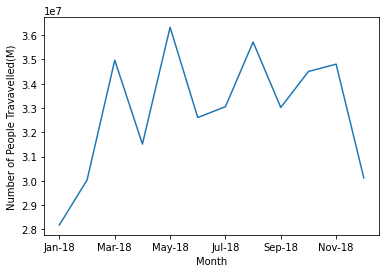

In [27]:
data_18.sum().plot()
plt.xlabel('Month')
plt.ylabel('Number of People Travavelled(M)')

<b>Observation:</b> In the year 2018 the graph indicates a chevroned pattern where the number of passengers where more in the month of May. Travellers were seen less in April compared to other reduced months.

### 2019 Jan to December

Text(0, 0.5, 'Number of People Travavelled(M)')

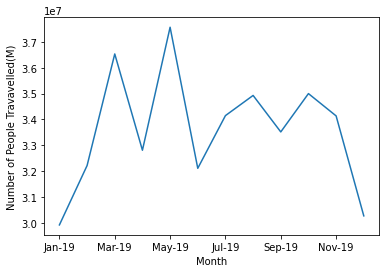

In [28]:
data_19.sum().plot()
plt.xlabel('Month')
plt.ylabel('Number of People Travavelled(M)')

<b>Observation:</b> As per other years the graphs indicated the same amount of travellers travelling in February,May,August and october. However the amount of travellers decreased from July to rest of the year compared to first six months.

### 2020 Jan to December

Text(0, 0.5, 'Number of People Travavelled(M)')

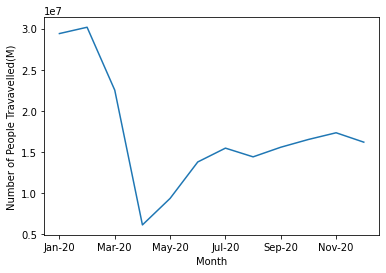

In [29]:
data_20.sum().plot()
plt.xlabel('Month')
plt.ylabel('Number of People Travavelled(M)')

<b>Observation:</b> The year 2020 was different in regards to orevious years.It is seen the numbers were at it peak from the start of the year until March. But it decreased repidly in April and started to incline from May. It slowly increased up tp 1.7 at the end of year.

### 2021 Jan to Sep

Text(0, 0.5, 'Number of People Travavelled(M)')

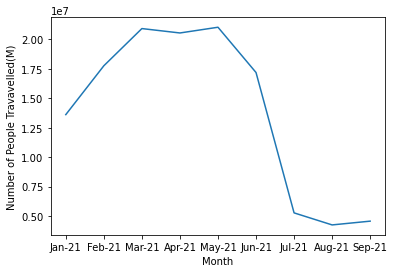

In [30]:
data_21.sum().plot()
plt.xlabel('Month')
plt.ylabel('Number of People Travavelled(M)')

# Hanando's work more here please add comments 

In [31]:
#Total People Travel Over Years 

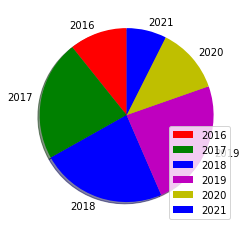

In [32]:
total = [total16,total17,total18,total19,total20,total21]
years = ['2016','2017','2018','2019','2020','2021']
color = ['r','g','b','m','y', 'b']
plt.pie(total, labels = years, colors = color, shadow = True, startangle = 90)
plt.legend()
plt.show()

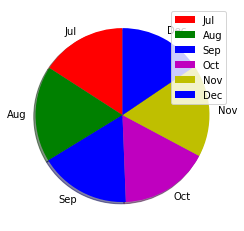

In [33]:
#2016
sum = data_16.sum()
months = ['Jul','Aug','Sep','Oct','Nov','Dec']
color = ['r','g','b','m','y', 'b']
plt.pie(sum, labels = months, colors = color, shadow = True, startangle = 90)
plt.legend()
plt.show()

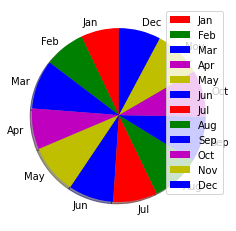

In [34]:
#2017
sum = data_17.sum()
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
color = ['r','g','b','m','y', 'b']
plt.pie(sum, labels = months, colors = color, shadow = True, startangle = 90)
plt.legend()
plt.show()

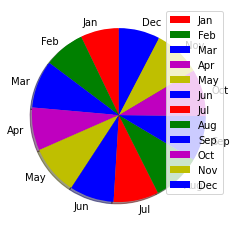

In [35]:
#2018
sum = data_18.sum()
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
color = ['r','g','b','m','y', 'b']
plt.pie(sum, labels = months, colors = color, shadow = True, startangle = 90)
plt.legend()
plt.show()

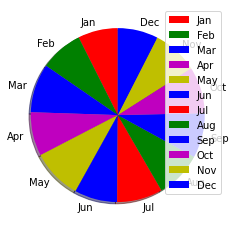

In [36]:
#2019
sum = data_19.sum()
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
color = ['r','g','b','m','y', 'b']
plt.pie(sum, labels = months, colors = color, shadow = True, startangle = 90)
plt.legend()
plt.show()

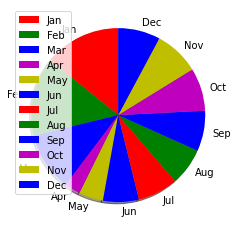

In [37]:
#2020
sum = data_20.sum()
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
color = ['r','g','b','m','y', 'b']
plt.pie(sum, labels = months, colors = color, shadow = True, startangle = 90)
plt.legend()
plt.show()

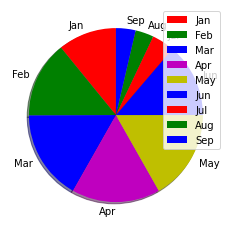

In [38]:
#2021
sum = data_21.sum()
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep']
color = ['r','g','b','m','y', 'b']
plt.pie(sum, labels = months, colors = color, shadow = True, startangle = 90)
plt.legend()
plt.show()

## add more comments here

# need a title 

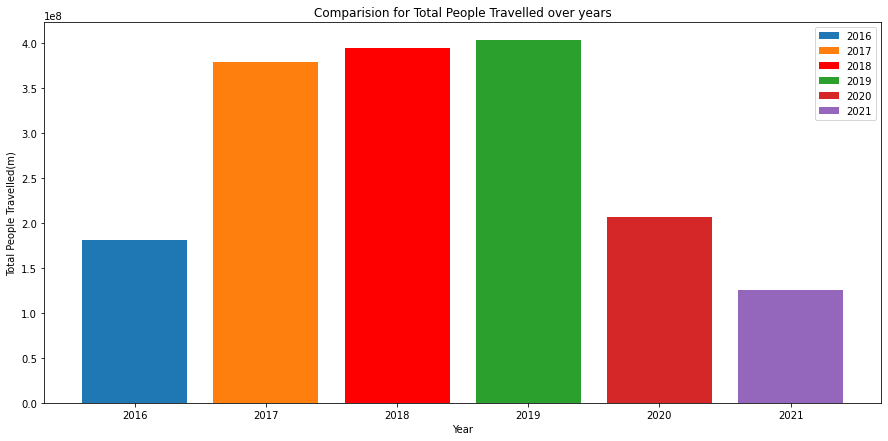

In [39]:
labels = ['2016', '2017','2018','2019','2020','2021']
plt.figure(figsize=(15,7))
plt.bar("2016", total16, align = 'center', label = '2016') 
plt.bar( "2017", total17,  align = 'center', label = '2017') 
plt.bar("2018", total18, color = 'red' ,align = 'center', label = '2018') 
plt.bar( "2019", total19,  align = 'center', label = '2019') 
plt.bar( "2020", total20, align = 'center', label = '2020') 
plt.bar( "2021", total21,  align = 'center', label = '2021') 
plt.title('Comparision for Total People Travelled over years') 
plt.ylabel('Total People Travelled(m)') 
plt.xlabel('Year') 
plt.legend()
plt.show()

### Observation

Here different colours are used to mark every year indiviually. It can be seen that people travelled a lot in 2019 and the least in the year 2021. The numbers increase by .2 from 2017 to 2018 consecutivly less in 2016 and 2021 cause there were limited amount of data for the respectable years in the data set. However it can be assumed that the number decreased from 2020 due to global pandemic. 

# need to add comments

In [40]:
new = pd.DataFrame({
    'month': ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
    '2016':[0,0,0,0,0,0,data_16['Jul-16'].sum(),data_16['Aug-16'].sum(),data_16['Sep-16'].sum(),data_16['Oct-16'].sum(),data_16['Nov-16'].sum(),data_16['Dec-16'].sum()],
    '2017':[data_17['Jan-17'].sum(),data_17['Feb-17'].sum(),data_17['Mar-17'].sum(),data_17['Apr-17'].sum(),data_17['May-17'].sum(),data_17['Jun-17'].sum(),data_17['Jul-17'].sum(),data_17['Aug-17'].sum(),data_17['Sep-17'].sum(),data_17['Oct-17'].sum(),data_17['Nov-17'].sum(),data_17['Dec-17'].sum()],
    '2018':[data_18['Jan-18'].sum(),data_18['Feb-18'].sum(),data_18['Mar-18'].sum(),data_18['Apr-18'].sum(),data_18['May-18'].sum(),data_18['Jun-18'].sum(),data_18['Jul-18'].sum(),data_18['Aug-18'].sum(),data_18['Sep-18'].sum(),data_18['Oct-18'].sum(),data_18['Nov-18'].sum(),data_18['Dec-18'].sum()],
    '2019':[data_19['Jan-19'].sum(),data_19['Feb-19'].sum(),data_19['Mar-19'].sum(),data_19['Apr-19'].sum(),data_19['May-19'].sum(),data_19['Jun-19'].sum(),data_19['Jul-19'].sum(),data_19['Aug-19'].sum(),data_19['Sep-19'].sum(),data_19['Oct-19'].sum(),data_19['Nov-19'].sum(),data_19['Dec-19'].sum()],
    '2020':[data_20['Jan-20'].sum(),data_20['Feb-20'].sum(),data_20['Mar-20'].sum(),data_20['Apr-20'].sum(),data_20['May-20'].sum(),data_20['Jun-20'].sum(),data_20['Jul-20'].sum(),data_20['Aug-20'].sum(),data_20['Sep-20'].sum(),data_20['Oct-20'].sum(),data_20['Nov-20'].sum(),data_20['Dec-20'].sum()],
    '2021':[data_21['Jan-21'].sum(),data_21['Feb-21'].sum(),data_21['Mar-21'].sum(),data_21['Apr-21'].sum(),data_21['May-21'].sum(),data_21['Jun-21'].sum(),data_21['Jul-21'].sum(),data_21['Aug-21'].sum(),data_21['Sep-21'].sum(),0,0,0]
})

<AxesSubplot:>

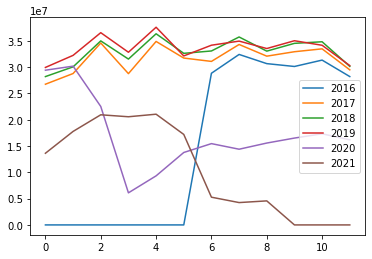

In [41]:
new.plot()

<b>Observation:</b> In the above plot it can be seen that the numbers were closely same for the years 2017 to 2019 which formed a chevroned pattern. t can be observed in 2016, here that the number of travellers increased rapidly from July and maintained the same graph for the rest of the year . Travels decreased from february to may in the year 2020 but started to incline slowly for the rest of the year. In 2021 the numbers were in the mid range until the middle of the year and started to decline for the rest of the year. 

Text(0, 0.5, 'Number of People Travavelled(M)')

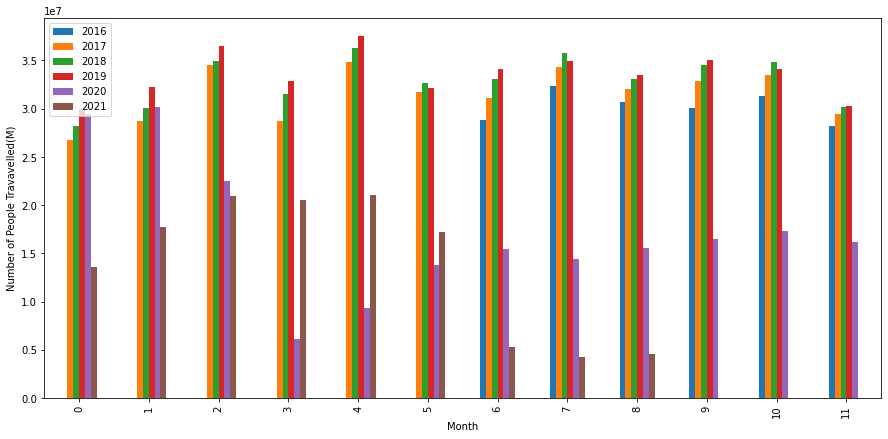

In [42]:
df2 = pd.DataFrame(new, columns=["month", '2016','2017','2018','2019','2020','2021'])
df2.plot.bar(figsize=(15,7));
plt.xlabel('Month')
plt.ylabel('Number of People Travavelled(M)')


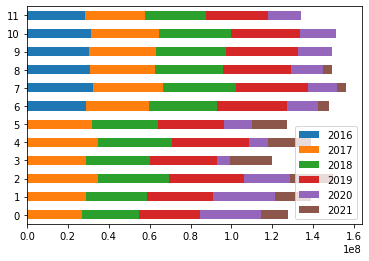

In [43]:
df2.plot.barh(stacked=True);

Text(0, 0.5, 'Number of People Travavelled(M)')

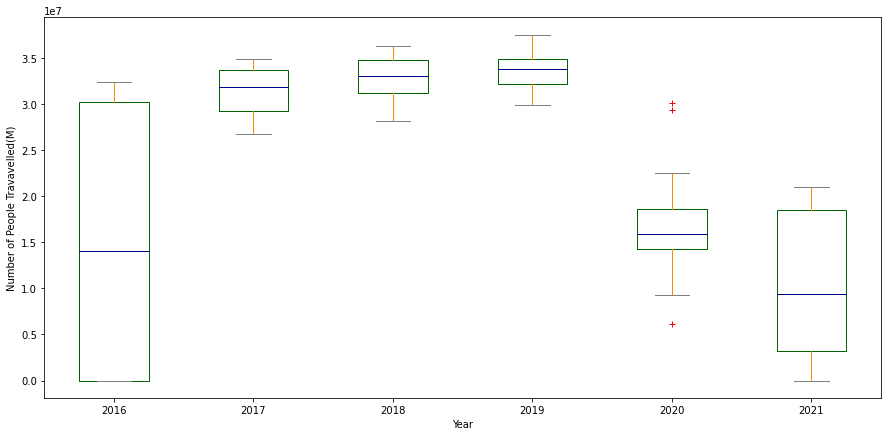

In [44]:
color = {
    "boxes": "DarkGreen",
    "whiskers": "DarkOrange",
    "medians": "DarkBlue",
    "caps": "Gray",
}
df2.plot.box(color=color, sym="r+",figsize=(15,7))
plt.xlabel('Year')
plt.ylabel('Number of People Travavelled(M)')

# Ryan's Work

In [45]:
## new column to merge all trainline 

data['TrainLine'] = data['Route'].str[0:2] ## targets the first two string from order date 
data['TrainLine'] = data['TrainLine'].astype('object')
data.head(25)

data['TrainLine']

0      T1
1      T1
2      T1
3      T1
4      T1
       ..
243    T9
244    T9
245    T9
246    T9
247    Gr
Name: TrainLine, Length: 248, dtype: object

## Reseting index


In [46]:
## reset index
data = data.dropna()
data = data.reset_index(drop=True)

In [47]:
data.head(1)

,Route,Travel_type,Jul-16,Aug-16,Sep-16,Oct-16,Nov-16,Dec-16,Jan-17,Feb-17,...,Jan-21,Feb-21,Mar-21,Apr-21,May-21,Jun-21,Jul-21,Aug-21,Sep-21,TrainLine
0,T1 North Shore Northern and Western Line,Adult,8575135,9484134,8956112,8778524,9221978,8036202,7774754,8446672,...,0,0,0,0,0,0,0,0,0,T1


In [48]:
df2016 = data[['TrainLine','Travel_type','Jul-16','Aug-16','Sep-16','Oct-16','Nov-16','Dec-16']]
df2017 = data[['TrainLine','Travel_type','Jan-17','Feb-17','Mar-17','Apr-17','May-17','Jun-17','Jul-17','Aug-17','Sep-17','Oct-17','Nov-17','Dec-17']]
df2018 = data[['TrainLine','Travel_type','Jan-18','Feb-18','Mar-18','Apr-18','May-18','Jun-18','Jul-18','Aug-18','Sep-18','Oct-18','Nov-18','Dec-18']]
df2019 = data[['TrainLine','Travel_type','Jan-19','Feb-19','Mar-19','Apr-19','May-19','Jun-19','Jul-19','Aug-19','Sep-19','Oct-19','Nov-19','Dec-19']]
df2020 = data[['TrainLine','Travel_type','Jan-20','Feb-20','Mar-20','Apr-20','May-20','Jun-20','Jul-20','Aug-20','Sep-20','Oct-20','Nov-20','Dec-20']]
df2021 = data[['TrainLine','Travel_type','Jan-21','Feb-21','Mar-21','Apr-21','May-21','Jun-21','Jul-21','Aug-21','Sep-21']]


In [49]:
## filtering adult coloumn 
adult16 = df2016[df2016.Travel_type == 'Adult']
adult17 = df2017[df2017.Travel_type == 'Adult']
adult18 = df2018[df2018.Travel_type == 'Adult']
adult19 = df2019[df2019.Travel_type == 'Adult']
adult20 = df2020[df2020.Travel_type == 'Adult']
adult21 = df2021[df2021.Travel_type == 'Adult']

Concession16 = df2016[df2016.Travel_type == 'Concession']
Concession17 = df2017[df2017.Travel_type == 'Concession']
Concession18 = df2018[df2018.Travel_type == 'Concession']
Concession19 = df2019[df2019.Travel_type == 'Concession']
Concession20 = df2020[df2020.Travel_type == 'Concession']
Concession21 = df2021[df2021.Travel_type == 'Concession']


In [50]:
## group by the trainline and travel type 
adult16 = adult16.groupby(['Travel_type','TrainLine'])
adult17 = adult17.groupby(['Travel_type','TrainLine'])
adult18 = adult18.groupby(['Travel_type','TrainLine'])
adult19 = adult19.groupby(['Travel_type','TrainLine'])
adult20 = adult20.groupby(['Travel_type','TrainLine'])
adult21 = adult21.groupby(['Travel_type','TrainLine'])

Concession16 = Concession16.groupby(['Travel_type','TrainLine'])
Concession17 = Concession17.groupby(['Travel_type','TrainLine'])
Concession18 = Concession18.groupby(['Travel_type','TrainLine'])
Concession19 = Concession19.groupby(['Travel_type','TrainLine'])
Concession20 = Concession20.groupby(['Travel_type','TrainLine'])
Concession21 = Concession21.groupby(['Travel_type','TrainLine'])


In [51]:
## multiple row Referring to the same trainline 

## Final sum of the tables yearly 

In [52]:
sumadult16 = adult16.sum()
sumadult17 = adult17.sum()
sumadult18 = adult18.sum()
sumadult19 = adult19.sum()
sumadult20 = adult20.sum()
sumadult21 = adult21.sum()

sumConcession16 = Concession16.sum()
sumConcession17 = Concession17.sum()
sumConcession18 = Concession18.sum()
sumConcession19 = Concession19.sum()
sumConcession20 = Concession20.sum()
sumConcession21 = Concession21.sum()

## final table that has the total adult table with yearly total 

In [53]:
sumadult21

Jan-21   Feb-21   Mar-21   Apr-21   May-21   Jun-21  \
Travel_type TrainLine                                                         
Adult       Bl          191587   215611   248167   267221   243592   218192   
            Ce          306328   400043   456765   474845   478407   364493   
            Hu           15693    19030    19000    21817    22552    18955   
            So          194022   231817   268885   258594   272613   216014   
            St               0        0        0        0        0        0   
            T1         2072890  2732176  3186268  3139610  3270742  2671322   
            T2         1265795  1531228  1798040  1642978  1600892  1494399   
            T3          639096   781137   851759   850934   846030   706701   
            T4         1538773  1713603  1982189  1856641  1937118  1596551   
            T5          201514   293372   284364   279616   305354   244406   
            T6            5673     6984     8548     7824     8229     7560   
            T7           19725    29285    37870    65358    48087    51312   
            T8          827040  1028685  1228446  1195959  1203356   999705   
            T9          591055   698236   772130   790858   846242   618143   

                       Jul-21  Aug-21  Sep-21  
Travel_type TrainLine                          
Adult       Bl          73486   51628   54772  
            Ce         115111   91711   92176  
            Hu          13904    6379    4551  
            So          65771   56574   54467  
            St              0       0       0  
            T1         922742  744936  789155  
            T2         559423  449097  479690  
            T3         208600  198920  231984  
            T4         631262  530477  534231  
            T5         100527   62668   71368  
            T6           3908    3310    4102  
            T7          25498   35077   33909  
            T8         362972  255058  269797  
            T9         220326  187027  194425

In [54]:
sumConcession21

Jan-21  Feb-21  Mar-21  Apr-21  May-21  Jun-21  Jul-21  \
Travel_type TrainLine                                                           
Concession  Bl          14093   20488   34830   29678   28821   20729    3274   
            Ce          27603   44189   75823   61827   68375   40290    6683   
            Hu           2066    3834    7063    5815    7781    3289    2510   
            So          14634   22587   37549   30148   33217   22117    3618   
            St              0       0       0       0       0       0       0   
            T1         174608  279788  458033  366573  382740  261707   51850   
            T2         100849  161106  252608  188122  185025  151407   25580   
            T3          50544   84021  125427  103522  100372   73846   10789   
            T4         108039  145573  215502  171811  181152  133337   30578   
            T5          14194   29189   42656   33213   36245   23978    3587   
            T6            421     543     803     694     732     642     238   
            T7           1121    2042    3669    6312    4302    4321    1061   
            T8          65615  102730  157702  123187  125765   93683   19999   
            T9          55153   84507  129248  106726  114341   72774   12120   

                       Aug-21  Sep-21  
Travel_type TrainLine                  
Concession  Bl           2023    2095  
            Ce           4640    4599  
            Hu            905     527  
            So           3215    2800  
            St              0       0  
            T1          38330   39946  
            T2          16866   18259  
            T3           9501   10790  
            T4          23371   24111  
            T5           1315    1654  
            T6            178     134  
            T7           1745    1595  
            T8          11707   12947  
            T9           8798    8911

In [55]:
# df2016 = df2016.groupby(['TrainLine','Travel_type'])
# df2017 = df2017.groupby(['TrainLine','Travel_type'])
# df2018 = df2018.groupby(['TrainLine','Travel_type'])
# df2019 = df2019.groupby(['TrainLine','Travel_type'])
# df2020 = df2020.groupby(['TrainLine','Travel_type'])
# df2021 = df2021.groupby(['TrainLine','Travel_type'])

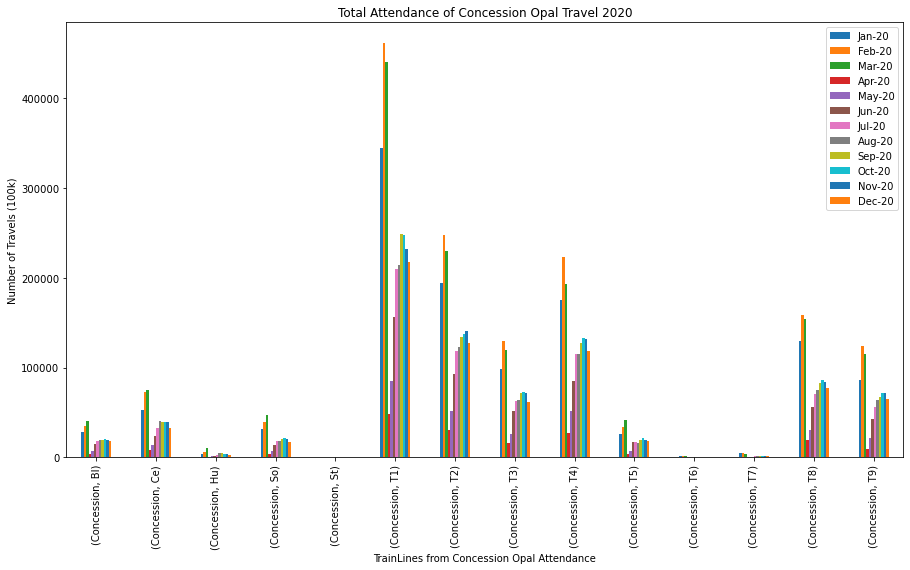

In [56]:
plot = sumConcession20.plot(kind='bar',figsize=(15,8), title="Total Attendance of Concession Opal Travel 2020")

plot.set_xlabel("TrainLines from Concession Opal Attendance")
plot.set_ylabel("Number of Travels (100k)")
plot.legend()

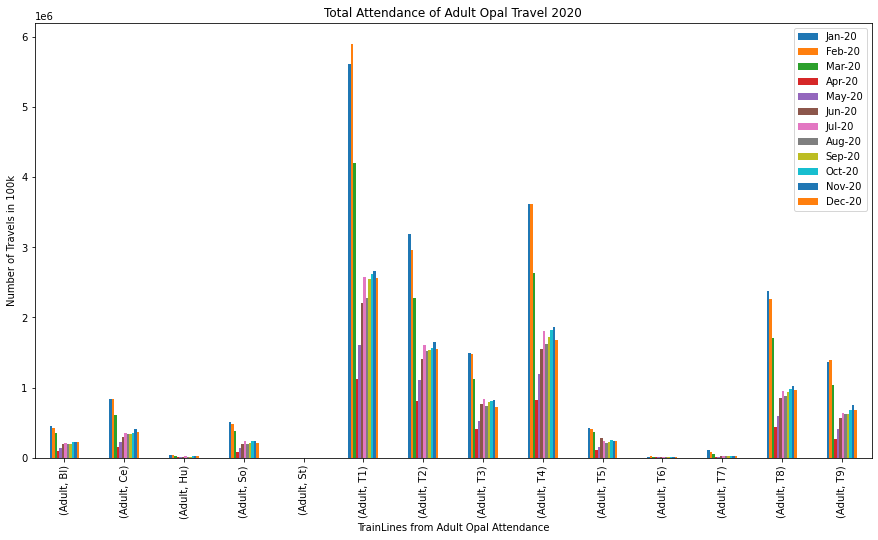

In [57]:
plot = sumadult20.plot(kind='bar',figsize=(15,8), title="Total Attendance of Adult Opal Travel 2020")

plot.set_xlabel("TrainLines from Adult Opal Attendance")
plot.set_ylabel("Number of Travels in 100k")
plot.legend()

Text(0, 0.5, 'Number of Travels (100k)')

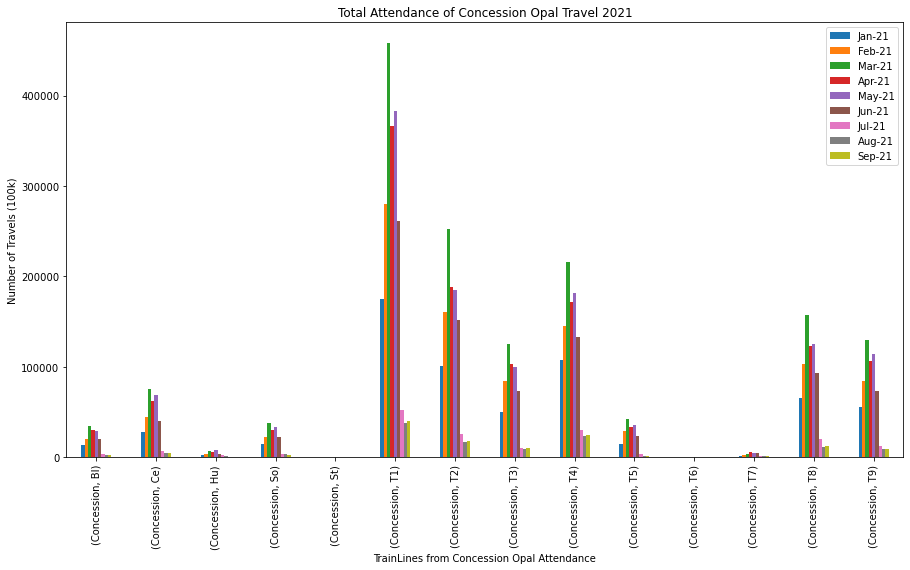

In [58]:
plot = sumConcession21.plot(kind='bar',figsize=(15,8), title="Total Attendance of Concession Opal Travel 2021",)
plot.set_xlabel("TrainLines from Concession Opal Attendance")
plot.set_ylabel("Number of Travels (100k)")


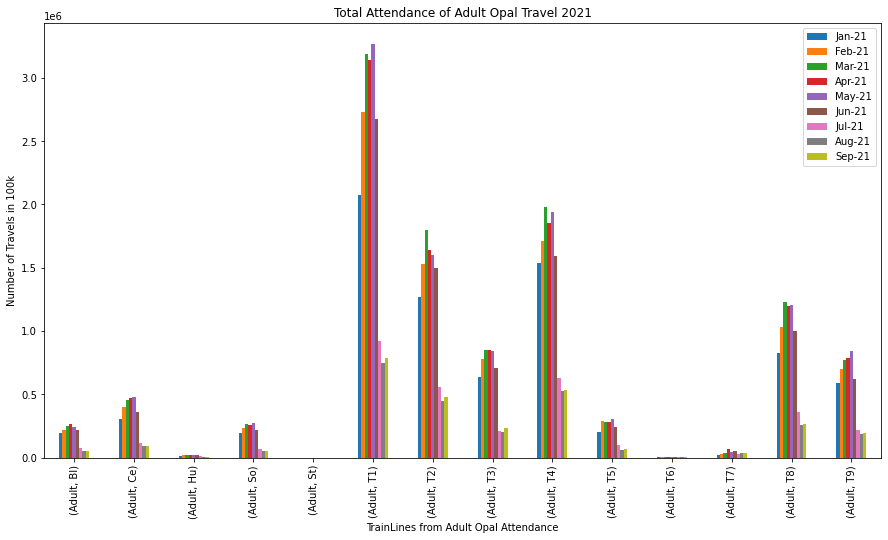

In [59]:
plot = sumadult21.plot(kind='bar',figsize=(15,8), title="Total Attendance of Adult Opal Travel 2021")

plot.set_xlabel("TrainLines from Adult Opal Attendance")
plot.set_ylabel("Number of Travels in 100k")
plot.legend()

In [60]:
sum2016 = adult16.sum()
sum2017 = adult17.sum()
sum2018 = adult18.sum()
sum2019 = adult19.sum()
sum2020 = adult20.sum()
sum2021 = adult21.sum()

In [61]:
sum2016

Jul-16   Aug-16   Sep-16   Oct-16   Nov-16   Dec-16
Travel_type TrainLine                                                      
Adult       Bl          537669   578758   570413   571910   585478   541787
            Ce         1073971  1125393  1090172  1051048  1126345   998680
            Hu           35095    29693    36901    35439    39132    33766
            So          578349   649695   626685   609826   663417   608878
            St               0        0        0        0        0        0
            T1         8575135  9484134  8956112  8778524  9221978  8036202
            T2         5266404  5568667  5382635  5328090  5519508  5124055
            T3         1615473  1767064  1689548  1691384  1747282  1588061
            T4         3970697  4389115  4212808  4042741  4461496  4147929
            T5          335951   372709   358049   349051   362326   322395
            T6           31864    40123    35855    33920    36327    30726
            T7          124590   124612   102987   116328   104223    99922
            T8               0        0        0        0        0        0
            T9               0        0        0        0        0        0

In [62]:
## create separate dataframes
## add total column 
sumadult16['TotalCountbyTrainLine'] = sumadult16['Jul-16'] + sumadult16['Aug-16'] + sumadult16['Sep-16'] + sumadult16['Oct-16'] + sumadult16['Nov-16'] + sumadult16['Dec-16'] 
sumadult17['TotalCountbyTrainLine'] = sumadult17['Jan-17'] + sumadult17['Feb-17'] + sumadult17['Mar-17'] + sumadult17['Apr-17'] + sumadult17['May-17'] + sumadult17['Jun-17'] + sumadult17['Jul-17'] + sumadult17['Aug-17'] + sumadult17['Sep-17'] + sumadult17['Oct-17'] + sumadult17['Nov-17'] + sumadult17['Dec-17'] 
sumadult18['TotalCountbyTrainLine'] = sumadult18['Jan-18'] + sumadult18['Feb-18'] + sumadult18['Mar-18'] + sumadult18['Apr-18'] + sumadult18['May-18'] + sumadult18['Jun-18'] + sumadult18['Jul-18'] + sumadult18['Aug-18'] + sumadult18['Sep-18'] + sumadult18['Oct-18'] + sumadult18['Nov-18'] + sumadult18['Dec-18'] 
sumadult19['TotalCountbyTrainLine'] = sumadult19['Jan-19'] + sumadult19['Feb-19'] + sumadult19['Mar-19'] + sumadult19['Apr-19'] + sumadult19['May-19'] + sumadult19['Jun-19'] + sumadult19['Jul-19'] + sumadult19['Aug-19'] + sumadult19['Sep-19'] + sumadult19['Oct-19'] + sumadult19['Nov-19'] + sumadult19['Dec-19'] 
sumadult20['TotalCountbyTrainLine'] = sumadult20['Jan-20'] + sumadult20['Feb-20'] + sumadult20['Mar-20'] + sumadult20['Apr-20'] + sumadult20['May-20'] + sumadult20['Jun-20'] + sumadult20['Jul-20'] + sumadult20['Aug-20'] + sumadult20['Sep-20'] + sumadult20['Oct-20'] + sumadult20['Nov-20'] + sumadult20['Dec-20'] 
sumadult21['TotalCountbyTrainLine'] = sumadult21['Jan-21'] + sumadult21['Feb-21'] + sumadult21['Mar-21'] + sumadult21['Apr-21'] + sumadult21['May-21'] + sumadult21['Jun-21'] + sumadult21['Jul-21'] + sumadult21['Aug-21'] + sumadult21['Sep-21'] 
#sumadult20['TotalCountbyTrainLine'] = sumadult20['TotalCountbyTrainLine'].astype('int32')


In [63]:
sumadult21

Jan-21   Feb-21   Mar-21   Apr-21   May-21   Jun-21  \
Travel_type TrainLine                                                         
Adult       Bl          191587   215611   248167   267221   243592   218192   
            Ce          306328   400043   456765   474845   478407   364493   
            Hu           15693    19030    19000    21817    22552    18955   
            So          194022   231817   268885   258594   272613   216014   
            St               0        0        0        0        0        0   
            T1         2072890  2732176  3186268  3139610  3270742  2671322   
            T2         1265795  1531228  1798040  1642978  1600892  1494399   
            T3          639096   781137   851759   850934   846030   706701   
            T4         1538773  1713603  1982189  1856641  1937118  1596551   
            T5          201514   293372   284364   279616   305354   244406   
            T6            5673     6984     8548     7824     8229     7560   
            T7           19725    29285    37870    65358    48087    51312   
            T8          827040  1028685  1228446  1195959  1203356   999705   
            T9          591055   698236   772130   790858   846242   618143   

                       Jul-21  Aug-21  Sep-21  TotalCountbyTrainLine  
Travel_type TrainLine                                                 
Adult       Bl          73486   51628   54772                1564256  
            Ce         115111   91711   92176                2779879  
            Hu          13904    6379    4551                 141881  
            So          65771   56574   54467                1618757  
            St              0       0       0                      0  
            T1         922742  744936  789155               19529841  
            T2         559423  449097  479690               10821542  
            T3         208600  198920  231984                5315161  
            T4         631262  530477  534231               12320845  
            T5         100527   62668   71368                1843189  
            T6           3908    3310    4102                  56138  
            T7          25498   35077   33909                 346121  
            T8         362972  255058  269797                7371018  
            T9         220326  187027  194425                4918442

## Linear Regression

In [64]:
# Initalise train and test variable 
train, test = train_test_split(data, test_size = 0.2, random_state=142)
print(train.shape)
print(test.shape)

(198, 66)
(50, 66)


In [65]:
reg = linear_model.LinearRegression()
X_train = train[['Dec-18', 'Dec-19']]
y_train = train['Dec-20']
X_test = test[['Dec-18', 'Dec-19']]
y_test = test['Dec-20']
reg.fit(X_train, y_train)
print("y = x *", reg.coef_, "+", reg.intercept_) 

y = x * [-0.15352069  0.60015968] + 9970.929169814655


In [66]:
predicted = reg.predict(X_test)
mse = ((np.array(y_test)-predicted)**2).sum()/len(y_test)
r2 = r2_score(y_test, predicted)
print("MSE:", mse) ##mean square error if it's too low means its good
print("R Squared:", r2) 

MSE: 138840440185.64987
R Squared: 0.9728672644240629


In [67]:
predicted = reg.predict(X_test)
mse = ((np.array(y_test)-predicted)**2).sum()/len(y_test)
r2 = r2_score(y_test, predicted)
print("MSE:", mse)
print("R Squared:", r2) 


MSE: 138840440185.64987
R Squared: 0.9728672644240629


## Hanndo's regression model but he used other columns
## please write another observation that includes the relationship between the alternative x and y variable and delete this column

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [69]:
lst = [['2016', total16],['2017', total17],['2018', total18],['2019', total19],['2020', total20],['2021', total21],]
df = pd.DataFrame(lst, columns = ['Year', 'Usage'])
df

,Year,Usage
0,2016,181476277
1,2017,378643158
2,2018,394847825
3,2019,403164448
4,2020,206638633
5,2021,125172973


In [70]:
train, test = train_test_split(df, test_size = 0.2, random_state=142)
print(train.shape)
print(test.shape)

(4, 2)
(2, 2)


In [71]:
x_train = train[['Year']]
y_train = train['Usage']

x_test = test[['Year']]
y_test = test['Usage']

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(4, 1)
(4,)
(2, 1)
(2,)


In [72]:
lr = linear_model.LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [73]:
y_pred = lr.predict(x_test)


In [74]:
y_pred

array([2.41605119e+08, 2.35359101e+08])

In [75]:
mse_lr = mean_squared_error(y_test, y_pred)


In [80]:
mse_lr

2.210803868218854e+16

In [84]:
pred_y_df=pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred, 'Difference': y_test - y_pred})
pred_y_df[0:20]

,Actual Value,Predicted Value,Difference
1,378643158,2.416051e+08,1.370380e+08
2,394847825,2.353591e+08,1.594887e+08


In [ ]:
###I think 3 is done? Regression is hella sus above^ will need 2 fix later 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data_l =data_l =data_c

In [ ]:
set(data_l['Aug-21'])

In [ ]:
# changeing strings to intiger value 
def get_categorical_col(df):
    s = (data_l.dtypes == 'object')
    cols = list(s[s].index)
    return cols
print("categorical columns in data:",get_categorical_col(data_l))

In [ ]:
# calling the function GET 
def enc(data_l):
    lab_enc=LabelEncoder()
    #onehot_enc=OneHotEncoder(drop='first', sparse=False)
    data_l['Route'] = lab_enc.fit_transform(data_l['Route'])
    data_l['Travel_type'] = lab_enc.fit_transform(data_l['Travel_type'])

enc(data_l)

In [ ]:
data_l

In [ ]:
# Split your data into training(80%) and testing data (20%) and use random_state=42
train, test = train_test_split(data_l, test_size=0.2, random_state=42)
print(train.shape)
print(test.shape)

In [ ]:
# Logistic Regression model
# Getting input data and targets for building prediction model
X_train =train.drop(['Aug-21'],axis=1)
y_train = train['Aug-21']
X_test =test.drop(['Aug-21'],axis=1)
y_test=test['Aug-21']

print(X_train.shape,"train x")
print(y_train.shape,"train y")
print(X_test.shape, "test x")
print(y_test.shape, "test y")
X_train.head()

In [ ]:
y_train.sum()

In [ ]:
# Training Logistic Regression model
model = LogisticRegression()
model.fit(X_train,y_train)

In [ ]:
# Do predictions on test set
# Doing predictions on train and test set
y_test_pred=model.predict(X_test)
y_train_pred = model.predict(X_train)

In [ ]:
# Evaluate the performance of your trained model
print("Accuracy score on training set: ", accuracy_score(y_train, y_train_pred))
print("Accuracy score on testing set: ", accuracy_score(y_test, y_test_pred))

In [ ]:
# Checking confusion matrix
print("Confusion matrix on test set: ")
print(confusion_matrix(y_test, y_test_pred))

In [ ]:
# future modification / relationship
corrmat = X_train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,10))
g=sns.heatmap(X_train[top_corr_features].corr(), annot=True, cmap="RdYlGn")

In [ ]:
# creating RFE object
lr_model=LogisticRegression()
rfe= RFE(estimator=lr_model, n_features_to_select=5, step=1)
rfe.fit(X_train, y_train)

In [ ]:
# doing evaluation
y_test_hat = rfe.predict(X_test)
print("accuracy score on test set: ", accuracy_score(y_test, y_test_hat))

In [ ]:
# summarize all features
for i in range(X_train.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

In [ ]:
# to increment number of features, one at each time
acc_scores = []
for i in range(1,64):
    clf = LogisticRegression()
    rfe = RFE(estimator=clf, n_features_to_select=i)
    # training model
    rfe.fit(X_train, y_train)
    # predicting on test set
    y_pred = rfe.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    # print this
    print("Acc on test set using", i, "features: ", acc_score)
    # append to the list
    acc_scores.append(acc_score)

In [ ]:
# Estimating accuracy score on test set using RFE by using different number of features
estimator = LogisticRegression()
acc_scores = []
for i in range(1, 64):
    selector = RFE(estimator, i)
    selector = selector.fit(X_train, y_train)
    supp = selector.get_support()

    predicted = selector.predict(X_test)
    acc_score = accuracy_score(y_test, predicted)
    acc_scores.append(acc_score)
  
best = 1
for item in acc_scores:
    if item < acc_scores[best - 1]:
        best = acc_scores.index(item) + 1

plt.grid()   
plt.xlabel('# No. of features')
plt.ylabel('Accuracy score on test set')
plt.plot(range(1, 64), acc_scores, marker = 'o', color = 'lightblue', markeredgewidth = 1 ,markeredgecolor = 'lightblue', markerfacecolor = 'None')
plt.plot(best, acc_scores[best-1], marker = 'o', markerfacecolor = 'lightblue')

## Observations
-  There are no apparent curves in the plots which means the model is linear in the parameters and its residuals.
-  The process of obtaining one observation does not affect the process of obtaining the next observations (independence).
-  Why the r square is close to 1, the model is bias and we cannot rely on a regression to predict future outcome by past records


### Multinomial naive bayes will be implemented below in order to see if it can predict past records.

# check

In [111]:
#---creating a new dataframe with the relevant datasets
dftest = data[['Dec-18','Dec-19','Dec-20']]

#---dropping null values and resetting the index
dftest = dftest.dropna()
dftest = dftest.reset_index(drop=True)

# Performing a multinomial naive bayes analysis on the data

we wil  create a naive bayes analysis function to allow us to perform the analysis in a modular manner below


In [112]:
#---performing a multinomial naive bayes analysis on the data
clf = MultinomialNB()
data = dftest[['Dec-18','Dec-19']]
target = dftest[['Dec-20']]
X_train, X_test, y_train, y_test = train_test_split(data, target, train_size = 0.70, random_state=0)

y_train=y_train.values
clf.fit (X_train, y_train)

y_test=y_test.values
y_pred = clf.predict(X_test)

print("Multinomial:", np.mean(y_pred==y_test))

Multinomial: 0.058133333333333335


/Users/ryanlam/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


The results from the naive bayes analysis -- similar to the linear regression -- are poor in the context of the data, though there is some level of prediction to be made. What this means is that past records from previous year can change due to external circumstances. for example, due to the covid pandemic, the sum of train attendance has staggared in comparison to previous years


In [113]:
# Explore the learned model parameters (probabilities)
# Note that the probabilities are in the logorithmic form. Why? The log-sum-exp trick for underflow of probability products
print('Estimated probability of classess: \n', np.e**clf.class_log_prior_)
print('Estimated class-conditional probabilities for each feature: \n', np.e**clf.feature_log_prob_)

Estimated probability of classess: 
 [0.30057803 0.01734104 0.00578035 0.00578035 0.00578035 0.00578035
 0.00578035 0.01156069 0.00578035 0.00578035 0.00578035 0.00578035
 0.00578035 0.00578035 0.00578035 0.00578035 0.00578035 0.00578035
 0.00578035 0.00578035 0.00578035 0.00578035 0.00578035 0.00578035
 0.00578035 0.00578035 0.00578035 0.00578035 0.00578035 0.00578035
 0.00578035 0.00578035 0.00578035 0.00578035 0.00578035 0.00578035
 0.00578035 0.00578035 0.00578035 0.00578035 0.00578035 0.00578035
 0.00578035 0.00578035 0.00578035 0.00578035 0.00578035 0.00578035
 0.00578035 0.00578035 0.00578035 0.00578035 0.00578035 0.00578035
 0.00578035 0.00578035 0.00578035 0.00578035 0.00578035 0.00578035
 0.00578035 0.00578035 0.00578035 0.00578035 0.00578035 0.00578035
 0.00578035 0.00578035 0.00578035 0.00578035 0.00578035 0.00578035
 0.00578035 0.00578035 0.00578035 0.00578035 0.00578035 0.00578035
 0.00578035 0.00578035 0.00578035 0.00578035 0.00578035 0.00578035
 0.00578035 0.00578035 0.

# i dint put my prediction model here makeing some few changes 